In [1]:
from aiida.plugins import DataFactory
import aiida
aiida.load_profile()

Profile<uuid='aaaefae20eac49f892e60b4593a470e3' name='quicksetup'>


# WorkChainを外部ファイル化する。

## structoolをinstallする。

```sh
cd structool
pip install -e .
```

```sh
verdi plugin list aiida.workflows 
```





daemonを複数(2つ)動かす場合。
```sh
$ verdi daemon start 2
```

複数daemonが動いていると
```sh
$ verdi daemon status
```
```console
Profile: 20210628
Daemon is running as PID 4102 since 2021-07-07 09:57:26
Active workers [2]:
  PID    MEM %    CPU %  started
-----  -------  -------  -------------------
 4108     1.29        0  2021-07-07 09:57:26
 4109     1.29        0  2021-07-07 09:57:26
Use verdi daemon [incr | decr] [num] to increase / decrease the amount of workers
```
という表示になる。例えば、daemon数を4増やして合計6にする。
```sh
$ verdi daemon incr 4
```
```sh
$ verdi daemon status
```
```console
Profile: 20210628
Daemon is running as PID 4102 since 2021-07-07 09:57:26
Active workers [6]:
  PID    MEM %    CPU %  started
-----  -------  -------  -------------------
 4108    1.29         0  2021-07-07 09:57:26
 4109    1.29         0  2021-07-07 09:57:26
 4220    1.286        0  2021-07-07 09:59:41
 4221    1.284        0  2021-07-07 09:59:41
 4222    1.289        0  2021-07-07 09:59:41
 4223    1.289        0  2021-07-07 09:59:41
Use verdi daemon [incr | decr] [num] to increase / decrease the amount of workers
```

In [2]:
from aiida.engine import calcfunction,workfunction, WorkChain, ToContext, submit,run,while_
from aiida.orm import Str,Float, Dict, load_node
import numpy as np
from aiida.plugins import DataFactory, WorkflowFactory
import time

In [3]:
# define inputs
def define_inputs():
    element = Str("Si")
    element.store()
    print("element.pk",element.pk)

    factor_list = [0.98, 0.99, 1.0, 1.1, 1.2]
    ArrayData = DataFactory('core.array')
    factor_array = ArrayData()
    factor_array.set_array("vector",np.array(factor_list))
    return element, factor_array
    
# run
element, factor_array = define_inputs()
import os
absolute_path = Str(os.getcwd())

element.pk 11992


In [4]:
from structool.strucvolume.workflows.rescaledstructuresvolume import RescaledStructuresVolume

In [5]:
result,node = run.get_node(RescaledStructuresVolume,element=element,
             factor_array=factor_array, absolute_path=absolute_path)
result, node

iter0 new_volume uuid: 2228fef3-9c2a-4254-9690-65549cf5740e (pk: 12000) value: 37.692734388326
iter1 new_volume uuid: 339494c0-2691-4f81-96a1-bfbeaa9a9cd1 (pk: 12003) value: 38.858407725797
iter2 new_volume uuid: c3e8de76-4ee8-4b62-94f7-e91021a32e42 (pk: 12006) value: 40.04786949775
iter3 new_volume uuid: 1ddbde87-6224-4060-97e6-d024772b452b (pk: 12009) value: 53.303714301505
iter4 new_volume uuid: 309265e9-f91c-4b8c-9231-8611290334ba (pk: 12012) value: 69.202718492112
calculation {'iter0': <Float: uuid: 2228fef3-9c2a-4254-9690-65549cf5740e (pk: 12000) value: 37.692734388326>, 'iter1': <Float: uuid: 339494c0-2691-4f81-96a1-bfbeaa9a9cd1 (pk: 12003) value: 38.858407725797>, 'iter2': <Float: uuid: c3e8de76-4ee8-4b62-94f7-e91021a32e42 (pk: 12006) value: 40.04786949775>, 'iter3': <Float: uuid: 1ddbde87-6224-4060-97e6-d024772b452b (pk: 12009) value: 53.303714301505>, 'iter4': <Float: uuid: 309265e9-f91c-4b8c-9231-8611290334ba (pk: 12012) value: 69.202718492112>}
pack {'iter0': <Float: uuid: 

({'volume_avg': <Float: uuid: a98d34bb-bc2f-4a0b-8151-e4e46df5ac2f (pk: 12016) value: 47.821088881098>},
 <WorkChainNode: uuid: 73fa1d99-7aa3-419c-a234-e03b13a1f992 (pk: 11995) (structool.strucvolume.workflows.rescaledstructuresvolume.RescaledStructuresVolume)>)

内部で定義したRescaledStructuresVolumeを削除して、WorkflowFactoryを用いて外部関数とする。

In [6]:
del RescaledStructuresVolume

In [7]:
rescaledstructuresvolume = WorkflowFactory("structool.rescaledvolume")
builder = rescaledstructuresvolume.get_builder()
builder.element=element
builder.factor_array=factor_array
builder.absolute_path = absolute_path
result, node = run.get_node(builder)

iter0 new_volume uuid: 61dd0bd8-98e3-42a7-9d89-358dcbd215e3 (pk: 12022) value: 37.692734388326
iter1 new_volume uuid: 709d0809-66d3-46c6-9e22-3d3d5a6baeb1 (pk: 12025) value: 38.858407725797
iter2 new_volume uuid: 2776329c-55e8-4e09-a37b-6acc615b9c1c (pk: 12028) value: 40.04786949775
iter3 new_volume uuid: ac3e0f06-8626-4fba-b5cd-abe4aae397a6 (pk: 12031) value: 53.303714301505
iter4 new_volume uuid: 3391ac6c-1eaf-4ce9-8c66-bd7b211d1e28 (pk: 12034) value: 69.202718492112
calculation {'iter0': <Float: uuid: 61dd0bd8-98e3-42a7-9d89-358dcbd215e3 (pk: 12022) value: 37.692734388326>, 'iter1': <Float: uuid: 709d0809-66d3-46c6-9e22-3d3d5a6baeb1 (pk: 12025) value: 38.858407725797>, 'iter2': <Float: uuid: 2776329c-55e8-4e09-a37b-6acc615b9c1c (pk: 12028) value: 40.04786949775>, 'iter3': <Float: uuid: ac3e0f06-8626-4fba-b5cd-abe4aae397a6 (pk: 12031) value: 53.303714301505>, 'iter4': <Float: uuid: 3391ac6c-1eaf-4ce9-8c66-bd7b211d1e28 (pk: 12034) value: 69.202718492112>}
pack {'iter0': <Float: uuid: 

In [8]:
pk = result["volume_avg"].pk
pk

12038

Success: Output written to `12038.dot.pdf`


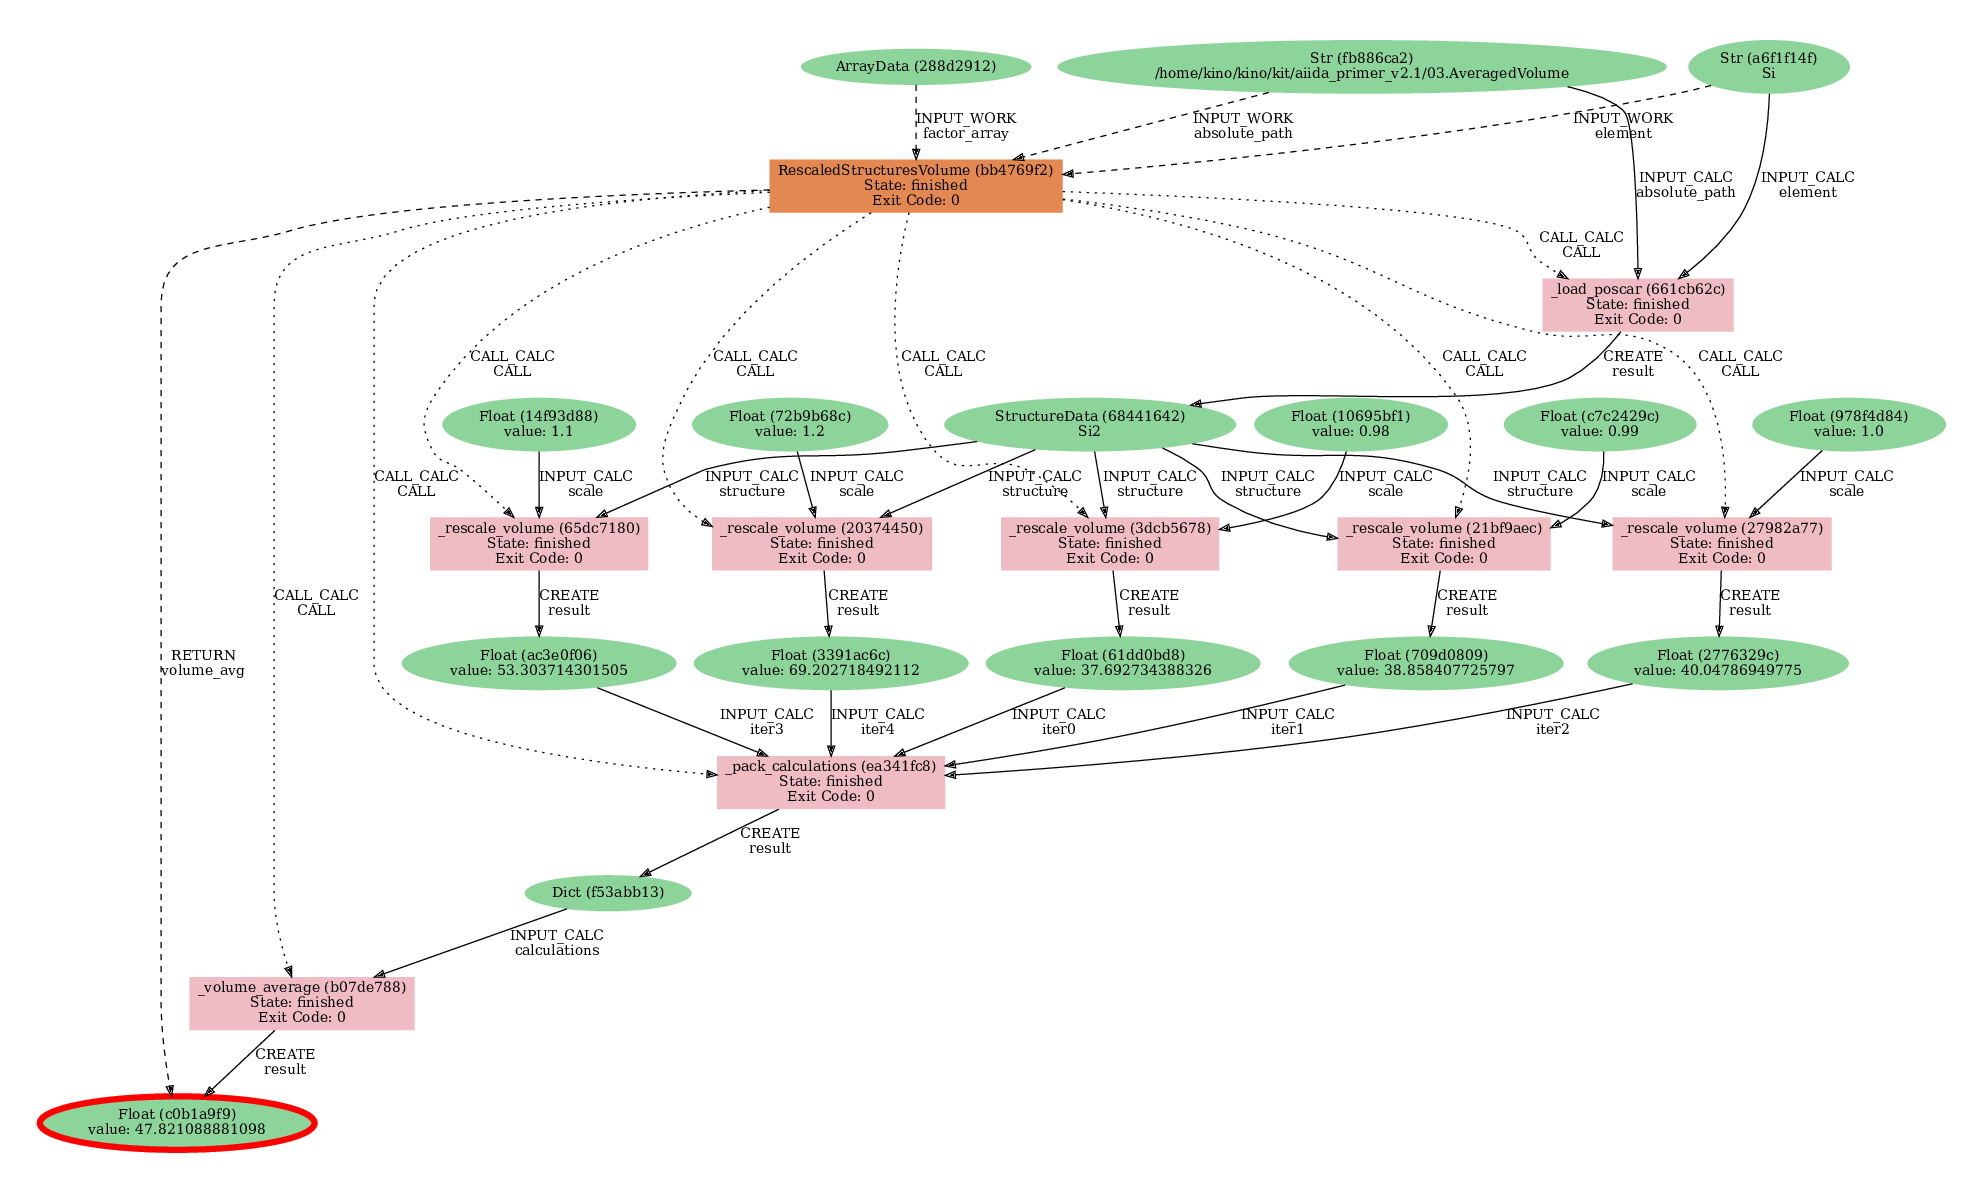

In [9]:
import subprocess
cmd = "verdi node graph generate {}".format(pk)
subprocess.call(cmd,shell=True)

from wand.image import Image as WImage
WImage(filename="{}.dot.pdf".format(pk))

In [10]:
rescaledstructuresvolume = WorkflowFactory("structool.rescaledvolume")
builder = rescaledstructuresvolume.get_builder()
builder.element = element
builder.factor_array = factor_array
builder.absolute_path = absolute_path
future = submit(builder)
future

<WorkChainNode: uuid: 2303d11b-e8e5-470a-9191-f51455286c29 (pk: 12039) (aiida.workflows:structool.rescaledvolume)>

In [11]:
while not future.is_finished:
    print(future.is_finished)
    time.sleep(2)
print(future.is_finished_ok)

print(future.outputs.volume_avg.value)

False
False
False
True
47.821088881098


In [12]:
pk = future.outputs.volume_avg.pk
pk

12060

Success: Output written to `12060.dot.pdf`


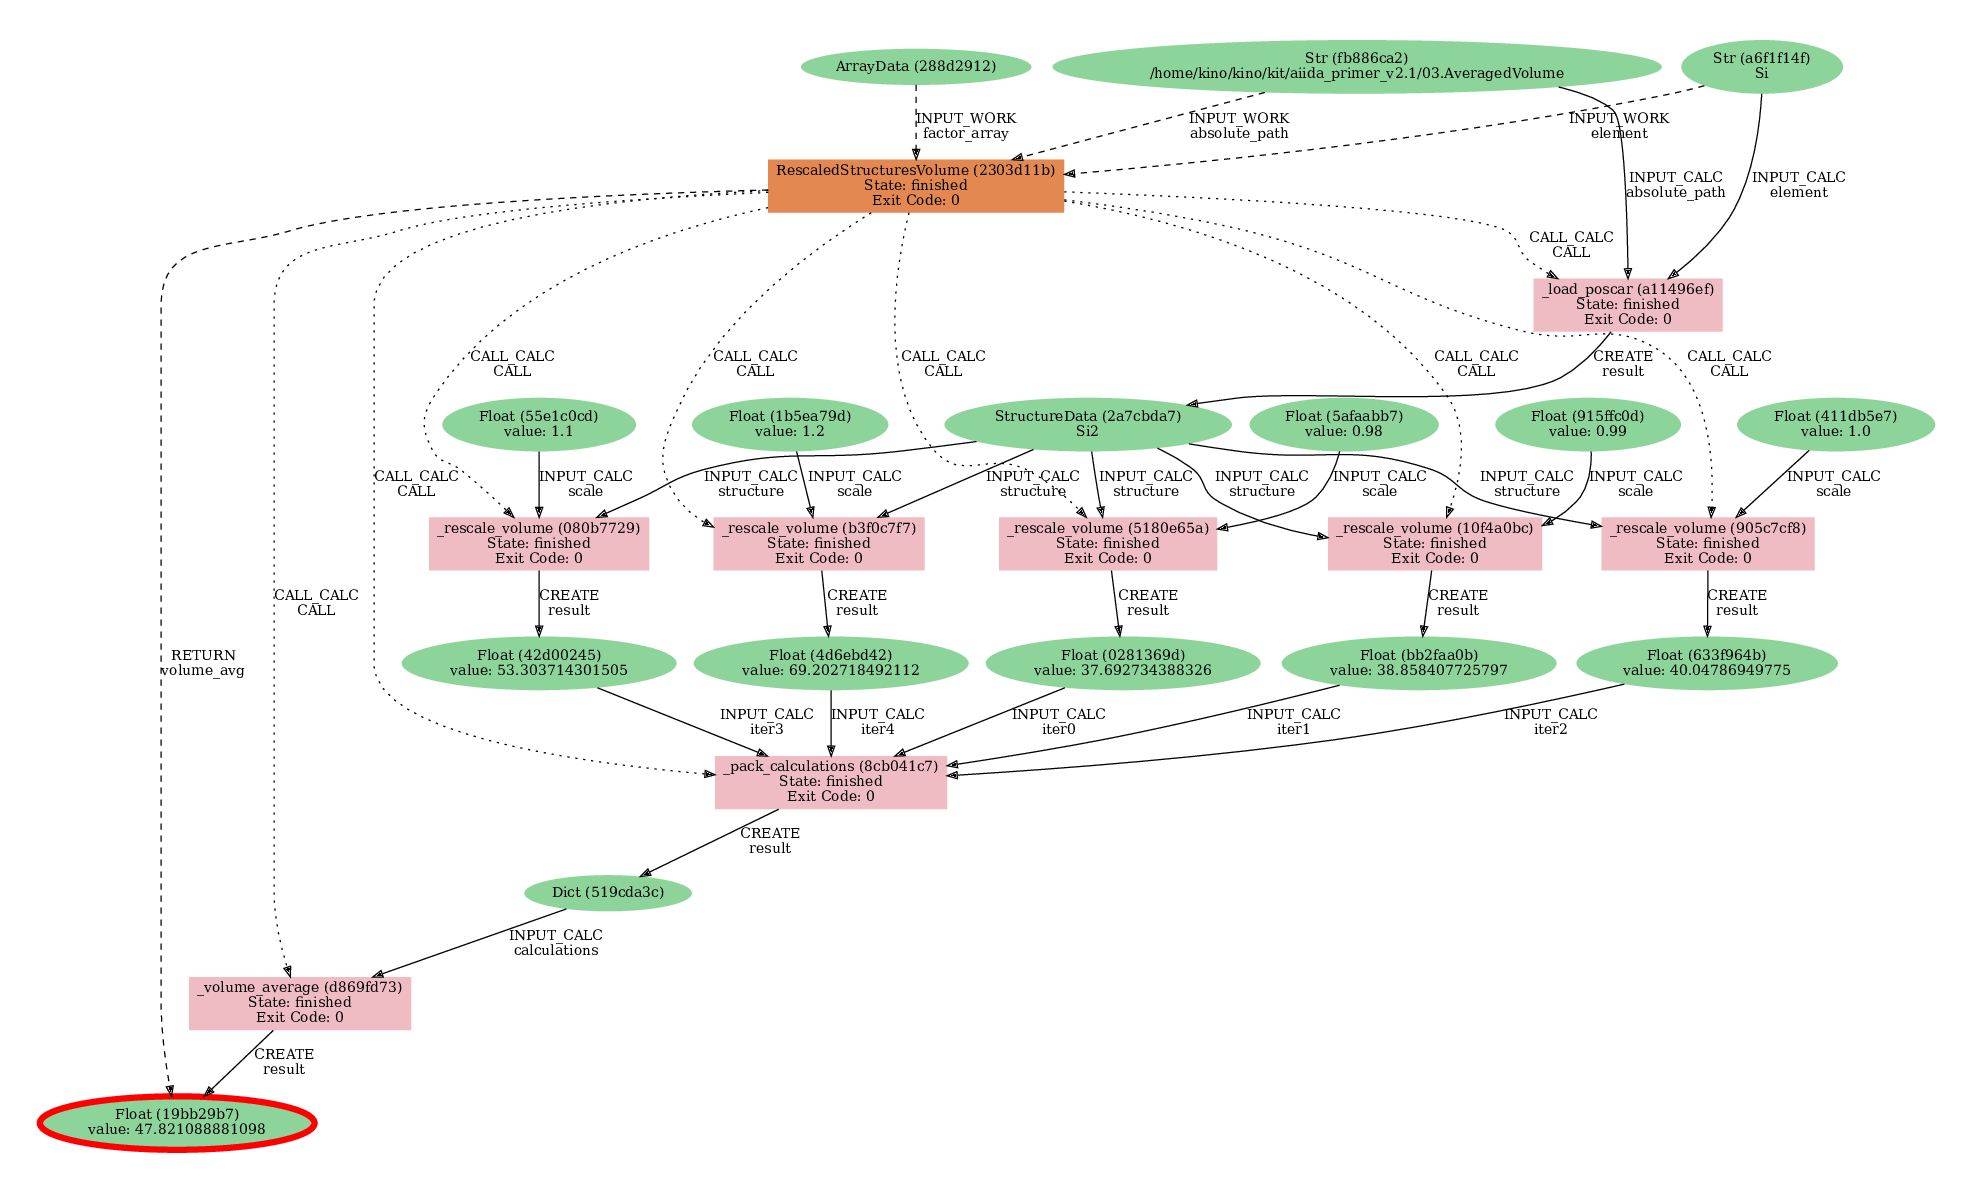

In [13]:
import subprocess
cmd = "verdi node graph generate {}".format(pk)
subprocess.call(cmd,shell=True)

from wand.image import Image as WImage
WImage(filename="{}.dot.pdf".format(pk))

# comment

direct schedulerでは
一番最後の
WorkflowFactory("structool.rescaledvolume")を用いて、
submit()するやり方以外はWorkChainが並列に動かない。

ただ、AiiDAの開発者はdirect schedulerはdebug用であるとしている.

Ref. https://aiida.readthedocs.io/projects/aiida-core/en/latest/topics/schedulers.html